# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This report aims to provide a summary of jobs offered in each location from one of Indonesia's job listing website, Kalibrr. The scrapped data from the website will be transformed to pandas DataFrame format containing the following columns:

* Company name
* Job title
* Job location	
* Number of days since the first time the job was posted	
* Application deadline
* Job posting date
* Remaining days to the application deadline	
* Number of job offered per location

## Step 1: Requesting the Data and Creating a BeautifulSoup

I begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/1')

To visualize what I get from the `request.get`, I use .content see what I exactly get, in here I slice it so it won't make our screen full of the html we get from the page. 

In [2]:
url_get.content[1:500]

b'!DOCTYPE html><html lang="id-ID"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="o'

I got a very unstructured and complex html, which actually contains the codes needed to show the webpages on my web browser. To tackle this problem and make the format more legible, I must use BeautifulSoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

I then created BeautifulSoup object for that purpose.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="id-ID">
 <head>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <script type="application/ld+json">
   {
    "@context": "https://schema.org",
    "@type": "WebSite",
    "url": "https://www.kalibrr.com",
    "potentialAction": [
      {
        "@type": "SearchAction",
        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",
        "query-input": "required name=search_term_string"
      }
     ]
  }
  </scrip


## Step 2: Finding the right key to scrap the data & Extracting the right information

Below is the screenshot of the scrapped website, Kalibrr. The images below display:
* The first page, which is the one we scrap
* The inspected elements of the page

**Note: I only scrapped the first page as per url in the capstone instruction: https://www.kalibrr.id/id-ID/job-board/te/data/1**

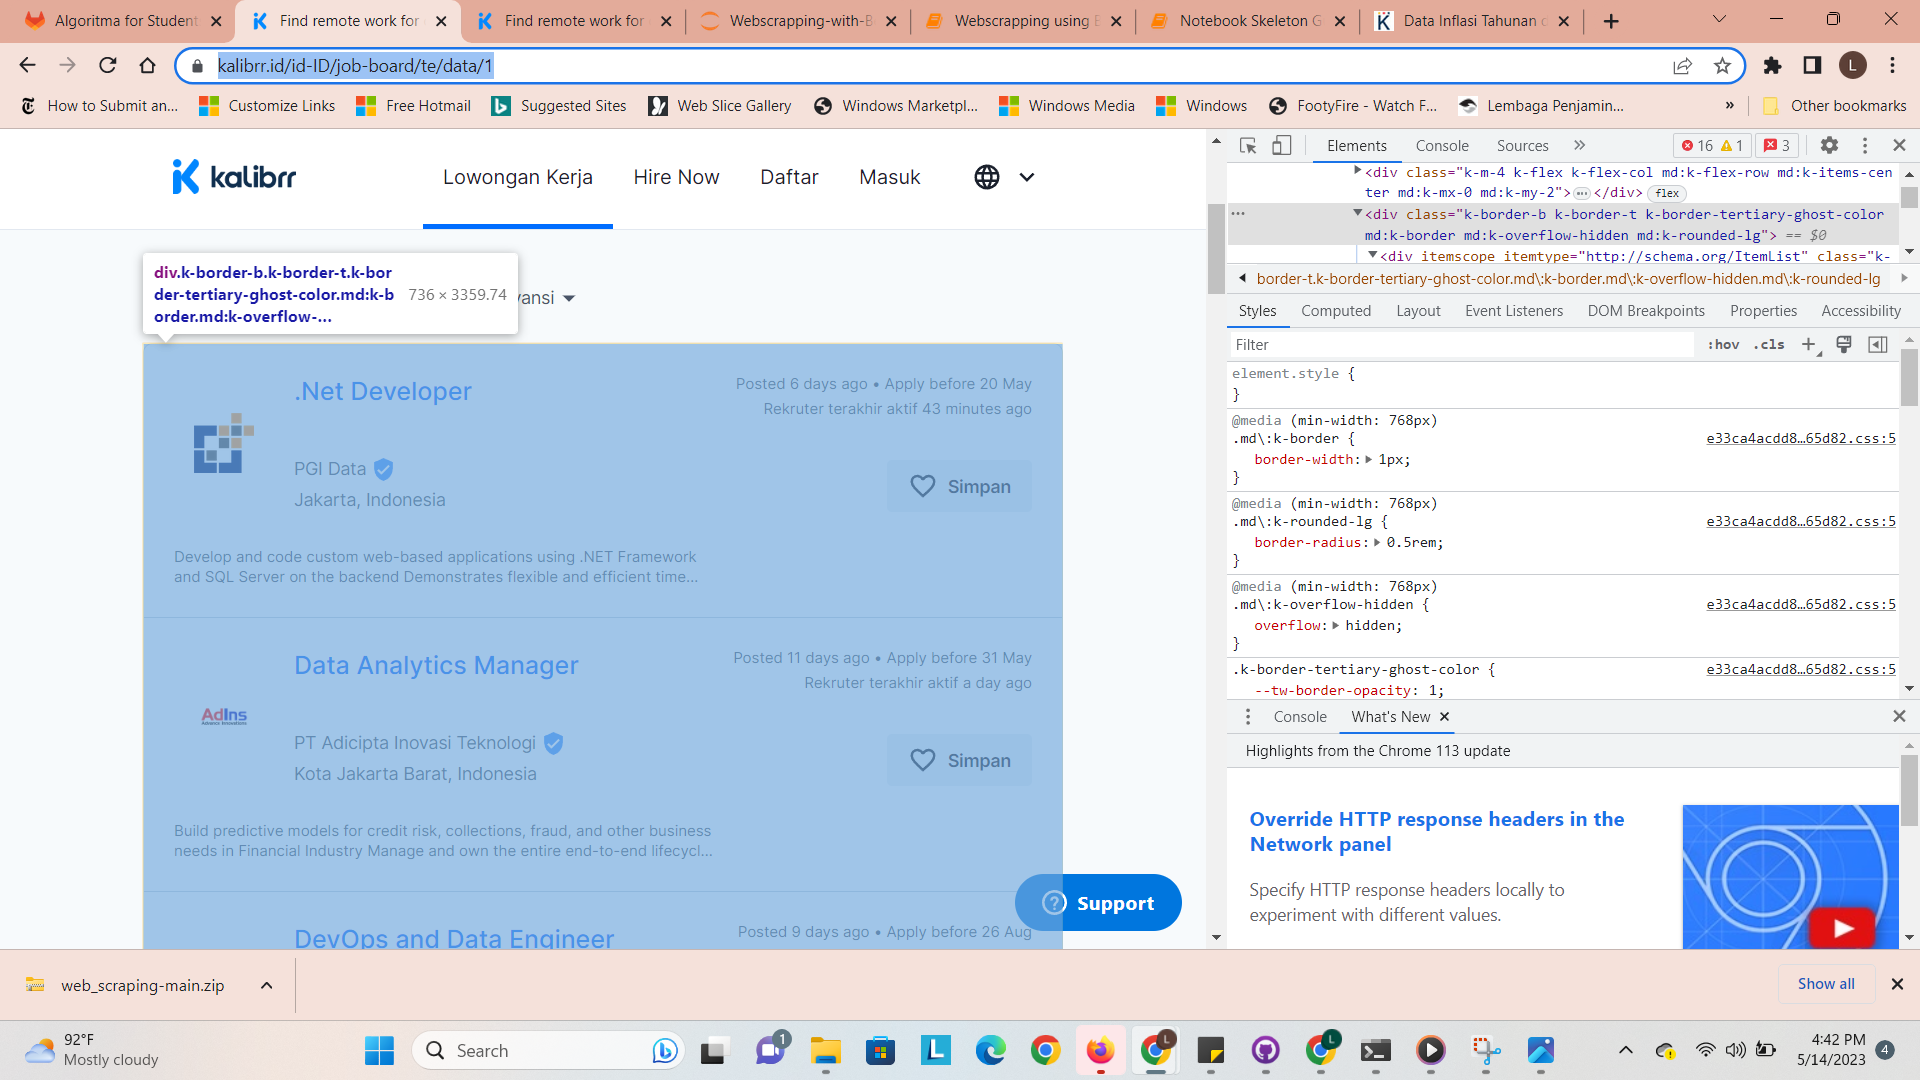

The next step is to find the key and put the key into the `.find()`. I put all the exploring the right key at this cell. After hovering around the page, I found that `k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg` is the right key covering all of the required contents I wanted to scrap.

In [5]:
table = soup.find('div', attrs = {'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
print(table.prettify()[:500])

<div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itempr


Next, I used `find_all` method to scrap each of the required data:
* Company Name
* Job Title
* Job Location
* Job Posting Date and Deadline

I also used `row_length` method to find out the number of rows from each of the data and `text` attribute to look at the sample content of each data.

In [6]:
company_name = table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})[:5]
company_name

[<span class="k-inline-flex k-items-center k-mb-1"><a class="k-text-subdued" href="/id-ID/c/pgi-data/jobs">PGI Data</a><span class="k-ml-1 k-mb-0.5"><div class="" style="display:inline" title="verified-business"><svg aria-hidden="true" class="MuiSvgIcon-root k-text-primary-color-500 MuiSvgIcon-fontSizeSmall" focusable="false" height="20" viewbox="0 0 24 24" width="20"><path d="M12 1L3 5v6c0 5.55 3.84 10.74 9 12 5.16-1.26 9-6.45 9-12V5l-9-4zm-2 16l-4-4 1.41-1.41L10 14.17l6.59-6.59L18 9l-8 8z"></path></svg></div></span></span>,
 <span class="k-inline-flex k-items-center k-mb-1"><a class="k-text-subdued" href="/id-ID/c/pt-adicipta-inovasi-teknologi/jobs">PT Adicipta Inovasi Teknologi</a><span class="k-ml-1 k-mb-0.5"><div class="" style="display:inline" title="verified-business"><svg aria-hidden="true" class="MuiSvgIcon-root k-text-primary-color-500 MuiSvgIcon-fontSizeSmall" focusable="false" height="20" viewbox="0 0 24 24" width="20"><path d="M12 1L3 5v6c0 5.55 3.84 10.74 9 12 5.16-1.26 9

In [7]:
company_name = table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})
row_length4 = len(company_name)
row_length4

15

In [8]:
table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})[0].text

'PGI Data'

In [9]:
job_title = table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})[:5]
job_title

[<a class="k-text-primary-color" href="/id-ID/c/pgi-data/jobs/174503/net-developer" itemprop="name">.Net Developer</a>,
 <a class="k-text-primary-color" href="/id-ID/c/pt-adicipta-inovasi-teknologi/jobs/197693/data-analytics-manager" itemprop="name">Data Analytics Manager</a>,
 <a class="k-text-primary-color" href="/id-ID/c/mobius-digital/jobs/219866/devops-and-data-engineer" itemprop="name">DevOps and Data Engineer</a>,
 <a class="k-text-primary-color" href="/id-ID/c/bfifinance/jobs/219737/data-analytic-specialist-etl" itemprop="name">Data Analytic Specialist ETL</a>,
 <a class="k-text-primary-color" href="/id-ID/c/astra-financial/jobs/218980/data-quality-analyst" itemprop="name">Data Quality Analyst</a>]

In [10]:
job_title = table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})
row_length = len(job_title)
row_length

15

In [11]:
table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})[0].text

'.Net Developer'

In [12]:
job_location = table.find_all('a', attrs = {'class':"k-text-subdued k-block"})[:5]
job_location

[<a class="k-text-subdued k-block" href="/id-ID/job-board/l/Jakarta">Jakarta, Indonesia</a>,
 <a class="k-text-subdued k-block" href="/id-ID/job-board/l/Kota-Jakarta-Barat">Kota Jakarta Barat, Indonesia</a>,
 <a class="k-text-subdued k-block" href="/id-ID/job-board/l/Tangerang-Selatan">Tangerang Selatan, Indonesia</a>,
 <a class="k-text-subdued k-block" href="/id-ID/job-board/l/Tangerang">Tangerang, Indonesia</a>,
 <a class="k-text-subdued k-block" href="/id-ID/job-board/l/Central-Jakarta-City">Central Jakarta City, Indonesia</a>]

In [13]:
job_location = table.find_all('a', attrs = {'class':"k-text-subdued k-block"})
row_length2 = len(job_location)
row_length2

15

In [14]:
table.find_all('a', attrs = {'class':"k-text-subdued k-block"})[0].text

'Jakarta, Indonesia'

In [15]:
postingdate_and_deadline = table.find_all('span', attrs = {'class':'k-block k-mb-1'})[:5]
postingdate_and_deadline

[<span class="k-block k-mb-1">Posted 7 days ago • Apply before 19 May</span>,
 <span class="k-block k-mb-1">Posted 12 days ago • Apply before 30 May</span>,
 <span class="k-block k-mb-1">Posted 10 days ago • Apply before 25 Aug</span>,
 <span class="k-block k-mb-1">Posted 7 days ago • Apply before 4 Jun</span>,
 <span class="k-block k-mb-1">Posted 13 days ago • Apply before 1 Jul</span>]

In [16]:
postingdate_and_deadline = table.find_all('span', attrs = {'class':'k-block k-mb-1'})
row_length3 = len(postingdate_and_deadline)
row_length3

15

In [17]:
table.find_all('span', attrs = {'class':'k-block k-mb-1'})[0].text

'Posted 7 days ago • Apply before 19 May'

After I finished with `BeautifulSoup` I then started using `loop function` to put the scrapped data into arrays before being organized into one DataFrame.

In [18]:
temp = [] #initiating a tuple

for i in range(0, row_length):

        
    #get company_name
    company_name = table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})[i].text
    company_name = company_name.strip()
    
    #get job_title
    job_title = table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})[i].text
    job_title = job_title.strip()
    
    #get job_location
    job_location = table.find_all('a', attrs = {'class':"k-text-subdued k-block"})[i].text
    job_location = job_location.strip()
    
    #get postingdate_and_deadline 
    postingdate_and_deadline = table.find_all('span', attrs = {'class':'k-block k-mb-1'})[i].text
    postingdate_and_deadline = postingdate_and_deadline.strip()

    temp.append((company_name, job_title, job_location, postingdate_and_deadline))
    
temp 

[('PGI Data',
  '.Net Developer',
  'Jakarta, Indonesia',
  'Posted 7 days ago • Apply before 19 May'),
 ('PT Adicipta Inovasi Teknologi',
  'Data Analytics Manager',
  'Kota Jakarta Barat, Indonesia',
  'Posted 12 days ago • Apply before 30 May'),
 ('Mobius Digital',
  'DevOps and Data Engineer',
  'Tangerang Selatan, Indonesia',
  'Posted 10 days ago • Apply before 25 Aug'),
 ('PT BFI Finance Indonesia Tbk',
  'Data Analytic Specialist ETL',
  'Tangerang, Indonesia',
  'Posted 7 days ago • Apply before 4 Jun'),
 ('Astra Financial',
  'Data Quality Analyst',
  'Central Jakarta City, Indonesia',
  'Posted 13 days ago • Apply before 1 Jul'),
 ('paper.id',
  'Senior Data Engineer',
  'North Jakarta, Indonesia',
  'Posted a month ago • Apply before 30 May'),
 ('MileApp',
  'Data Scientist',
  'West Jakarta, Indonesia',
  'Posted 6 days ago • Apply before 30 Jul'),
 ('PGI Data',
  'Odoo Developer',
  'Jakarta, Indonesia',
  'Posted 11 days ago • Apply before 29 Jun'),
 ('Kalibrr',
  'Data 

## Step 3: Creating data frame & Data wrangling

Next step was to put the arrays into DataFrame by using `pandas` library. 

In [47]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('company_name', 'job_title', 'job_location', 'postingdate_and_deadline'))
df.head()

company_name                     job_title   
0                       PGI Data                .Net Developer  \
1  PT Adicipta Inovasi Teknologi        Data Analytics Manager   
2                 Mobius Digital      DevOps and Data Engineer   
3   PT BFI Finance Indonesia Tbk  Data Analytic Specialist ETL   
4                Astra Financial          Data Quality Analyst   

                      job_location                  postingdate_and_deadline  
0               Jakarta, Indonesia   Posted 7 days ago • Apply before 19 May  
1    Kota Jakarta Barat, Indonesia  Posted 12 days ago • Apply before 30 May  
2     Tangerang Selatan, Indonesia  Posted 10 days ago • Apply before 25 Aug  
3             Tangerang, Indonesia    Posted 7 days ago • Apply before 4 Jun  
4  Central Jakarta City, Indonesia   Posted 13 days ago • Apply before 1 Jul

The data cleaning involved a number of method and attributes. My goal was to make the DataFrame display more legible by transforming `postingdate_and_deadline` column into more readable format and to standardize the `job_location` naming as per below.

In [48]:
df['job_location'] = df['job_location'].str.replace(', Indonesia', '')
df['job_location'] = df['job_location'].str.replace('Jakarta Selatan', 'South Jakarta')
df['job_location'] = df['job_location'].str.replace('Kota Jakarta Barat', 'West Jakarta')
df['job_location'] = df['job_location'].str.replace('Jakarta Pusat', 'Central Jakarta')
df['job_location'] = df['job_location'].str.replace('Central Jakarta City', 'Central Jakarta')
df['job_location'] = df['job_location'].str.replace('Tangerang Selatan', 'South Tangerang')
df['postingdate_and_deadline'] = df['postingdate_and_deadline'].str.replace('a month','30 days')
df['postingdate_and_deadline'] = df['postingdate_and_deadline'].str.replace('a day','1 day')
df['posted_since_days_ago'] = df['postingdate_and_deadline'].str.extract('(\d+)')
df['application_deadline'] = df['postingdate_and_deadline'].str.slice(start = -6)
df= df.drop(['postingdate_and_deadline'], axis=1)
df

company_name                        job_title   
0                        PGI Data                   .Net Developer  \
1   PT Adicipta Inovasi Teknologi           Data Analytics Manager   
2                  Mobius Digital         DevOps and Data Engineer   
3    PT BFI Finance Indonesia Tbk     Data Analytic Specialist ETL   
4                 Astra Financial             Data Quality Analyst   
5                        paper.id             Senior Data Engineer   
6                         MileApp                   Data Scientist   
7                        PGI Data                   Odoo Developer   
8                         Kalibrr                   Data Scientist   
9                 PT. Royal Trust                       Data Entry   
10           PT Fajar Gelora Inti                  Finance Manager   
11       PT Global Urban Esensial                      Illustrator   
12         Magna Solusi Indonesia  Business Intelligence Developer   
13                        PhinCon                    iOS Developer   
14   Astra Credit Companies (ACC)                          Auditor   

       job_location posted_since_days_ago application_deadline  
0           Jakarta                     7               19 May  
1      West Jakarta                    12               30 May  
2   South Tangerang                    10               25 Aug  
3         Tangerang                     7                4 Jun  
4   Central Jakarta                    13                1 Jul  
5     North Jakarta                    30               30 May  
6      West Jakarta                     6               30 Jul  
7           Jakarta                    11               29 Jun  
8     South Jakarta                     5                9 May  
9     South Jakarta                    30               30 May  
10  Central Jakarta                     2               14 Jun  
11  South Tangerang                     5               29 Jun  
12    South Jakarta                    11                1 Jul  
13    South Jakarta                     5                9 Jun  
14    South Jakarta                     4               30 Jul

Next, I needed to ensure each column has the appropriate data type. 

In [49]:
df.dtypes

company_name             object
job_title                object
job_location             object
posted_since_days_ago    object
application_deadline     object
dtype: object

In [50]:
df['job_location'] = df['job_location'].astype('category')
df.dtypes

company_name               object
job_title                  object
job_location             category
posted_since_days_ago      object
application_deadline       object
dtype: object

I also refined the `application_deadline` column into date format.

In [51]:
#Any more efficient way to do this?

df['application_deadline'] = df['application_deadline'].str.replace(' May','-05-2023' )
df['application_deadline'] = df['application_deadline'].str.replace(' Jun','-06-2023' )
df['application_deadline'] = df['application_deadline'].str.replace(' Jul','-07-2023' )
df['application_deadline'] = df['application_deadline'].str.replace(' Aug','-08-2023' )
df['application_deadline'] = pd.to_datetime(df['application_deadline'], format='mixed', dayfirst=True )

In [52]:
df.dtypes

company_name                     object
job_title                        object
job_location                   category
posted_since_days_ago            object
application_deadline     datetime64[ns]
dtype: object

In [53]:
df

company_name                        job_title   
0                        PGI Data                   .Net Developer  \
1   PT Adicipta Inovasi Teknologi           Data Analytics Manager   
2                  Mobius Digital         DevOps and Data Engineer   
3    PT BFI Finance Indonesia Tbk     Data Analytic Specialist ETL   
4                 Astra Financial             Data Quality Analyst   
5                        paper.id             Senior Data Engineer   
6                         MileApp                   Data Scientist   
7                        PGI Data                   Odoo Developer   
8                         Kalibrr                   Data Scientist   
9                 PT. Royal Trust                       Data Entry   
10           PT Fajar Gelora Inti                  Finance Manager   
11       PT Global Urban Esensial                      Illustrator   
12         Magna Solusi Indonesia  Business Intelligence Developer   
13                        PhinCon                    iOS Developer   
14   Astra Credit Companies (ACC)                          Auditor   

       job_location posted_since_days_ago application_deadline  
0           Jakarta                     7           2023-05-19  
1      West Jakarta                    12           2023-05-30  
2   South Tangerang                    10           2023-08-25  
3         Tangerang                     7           2023-06-04  
4   Central Jakarta                    13           2023-07-01  
5     North Jakarta                    30           2023-05-30  
6      West Jakarta                     6           2023-07-30  
7           Jakarta                    11           2023-06-29  
8     South Jakarta                     5           2023-05-09  
9     South Jakarta                    30           2023-05-30  
10  Central Jakarta                     2           2023-06-14  
11  South Tangerang                     5           2023-06-29  
12    South Jakarta                    11           2023-07-01  
13    South Jakarta                     5           2023-06-09  
14    South Jakarta                     4           2023-07-30

Additionally, I thought of adding `remaining_days` column to give the reader information about how many days are left before the application is closed. I accomplished the task using `to_timedelta` method. I also inserted one additional column `number_of_job_offered` for easier execution of `count` function in the `pivot_table` as my purpose was to count how many jobs posted from each location.

In [54]:
df['posted_since_days_ago'] = df['posted_since_days_ago'].astype('int')
df.dtypes

company_name                     object
job_title                        object
job_location                   category
posted_since_days_ago             int32
application_deadline     datetime64[ns]
dtype: object

In [55]:
df['posted_since_days_ago'] = pd.to_timedelta(df['posted_since_days_ago'], unit='D')

In [56]:
df['posting_date'] = pd.to_datetime('today') - df['posted_since_days_ago']
df['posting_date'] = df['posting_date'].dt.date
df['remaining_days'] = pd.to_datetime('today') - df['application_deadline']
df['remaining_days'] = abs(df['remaining_days'].dt.days)
df['number_of_job_offered'] = 1
df['posting_date'] = pd.to_datetime(df['posting_date'])
df.dtypes
df

company_name                        job_title   
0                        PGI Data                   .Net Developer  \
1   PT Adicipta Inovasi Teknologi           Data Analytics Manager   
2                  Mobius Digital         DevOps and Data Engineer   
3    PT BFI Finance Indonesia Tbk     Data Analytic Specialist ETL   
4                 Astra Financial             Data Quality Analyst   
5                        paper.id             Senior Data Engineer   
6                         MileApp                   Data Scientist   
7                        PGI Data                   Odoo Developer   
8                         Kalibrr                   Data Scientist   
9                 PT. Royal Trust                       Data Entry   
10           PT Fajar Gelora Inti                  Finance Manager   
11       PT Global Urban Esensial                      Illustrator   
12         Magna Solusi Indonesia  Business Intelligence Developer   
13                        PhinCon                    iOS Developer   
14   Astra Credit Companies (ACC)                          Auditor   

       job_location posted_since_days_ago application_deadline posting_date   
0           Jakarta                7 days           2023-05-19   2023-05-08  \
1      West Jakarta               12 days           2023-05-30   2023-05-03   
2   South Tangerang               10 days           2023-08-25   2023-05-05   
3         Tangerang                7 days           2023-06-04   2023-05-08   
4   Central Jakarta               13 days           2023-07-01   2023-05-02   
5     North Jakarta               30 days           2023-05-30   2023-04-15   
6      West Jakarta                6 days           2023-07-30   2023-05-09   
7           Jakarta               11 days           2023-06-29   2023-05-04   
8     South Jakarta                5 days           2023-05-09   2023-05-10   
9     South Jakarta               30 days           2023-05-30   2023-04-15   
10  Central Jakarta                2 days           2023-06-14   2023-05-13   
11  South Tangerang                5 days           2023-06-29   2023-05-10   
12    South Jakarta               11 days           2023-07-01   2023-05-04   
13    South Jakarta                5 days           2023-06-09   2023-05-10   
14    South Jakarta                4 days           2023-07-30   2023-05-11   

    remaining_days  number_of_job_offered  
0                4                      1  
1               15                      1  
2              102                      1  
3               20                      1  
4               47                      1  
5               15                      1  
6               76                      1  
7               45                      1  
8                6                      1  
9               15                      1  
10              30                      1  
11              45                      1  
12              47                      1  
13              25                      1  
14              76                      1

The `pivot_table` method was used to summarize the result (how many jobs offers in each location). The data was sort with `sort_values` before being presented in a bar chart.

In [57]:
df_viz = df.pivot_table(index = 'job_location',
                        values = 'number_of_job_offered',
                        aggfunc = 'count')
df_viz.reset_index()

job_location  number_of_job_offered
0  Central Jakarta                      2
1          Jakarta                      2
2    North Jakarta                      1
3    South Jakarta                      5
4  South Tangerang                      2
5        Tangerang                      1
6     West Jakarta                      2

<Axes: xlabel='job_location'>

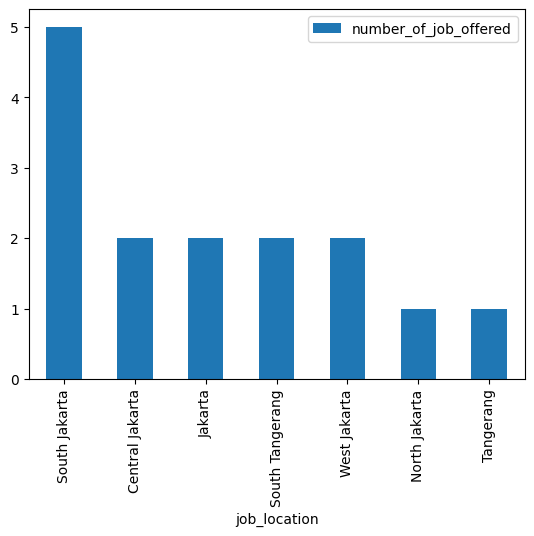

In [58]:
df_viz.sort_values(by='number_of_job_offered', ascending = False).plot.bar()

### Step 4: Implementing your webscrapping to the flask dashboard

- I copy pasted all of my web scrapping process to the desired position on the `app.py`
- I also changed the title of the dasboard at `index.html`

Below is the screen capture of my `Flask` dashboard.

## Step 5: Analysis and Conclusion

From the chart below, there are some conclusions to be drawn. 

<Axes: xlabel='job_location'>

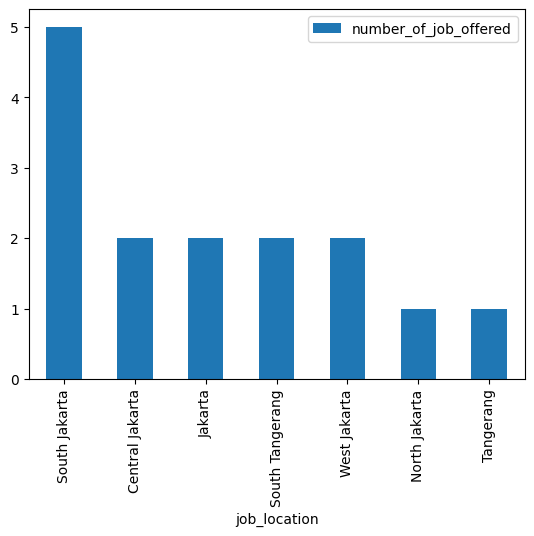

In [59]:
df_viz.sort_values(by='number_of_job_offered', ascending = False).plot.bar()

**Insights:**
* Jakarta area has more jobs offered compared to Tangerang.
* `South Jakarta` has the highest number of jobs offered.
* Some companies does not specify the city (they only mentions Jakarta or Tangerang). 

**Conclusion:** Jakarta offers more job opportunities than its neighbour city, Tangerang. This also implies the gap in economic opportunities between both cities, which deserves further research.


If I have more time, I would like to conduct additional analysis and implement it in a `webapp`.